In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import statsmodels.api as sm
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

%matplotlib inline

In [2]:
#Import cleaned and scaled csv
logs_scaled=pd.read_csv('Scaled_Data.csv', index_col=0)

logs_scaled=logs_scaled.dropna(subset=['curve1','curve3','Ln_curve3','curve4','curve5','target_log','curve1_diff','curve3_diff','curve4_diff','curve5_diff','Target_diff','curve1_diff_2nd','curve3_diff_2nd','curve4_diff_2nd','curve5_diff_2nd','Target_diff_2nd','Roll20_curve1','Roll20_curve1_diff_2nd'])

In [3]:
list(logs_scaled)

['Observation_Num',
 'UWI_PROXY',
 'depth',
 'curve1',
 'curve2',
 'curve3',
 'curve4',
 'curve5',
 'target_log',
 'curve1_diff',
 'curve3_diff',
 'curve4_diff',
 'curve5_diff',
 'Target_diff',
 'curve1_diff_2nd',
 'curve3_diff_2nd',
 'curve4_diff_2nd',
 'curve5_diff_2nd',
 'Target_diff_2nd',
 'Roll_curve1_diff_2nd',
 'Roll_curve3_diff_2nd',
 'Roll_curve4_diff_2nd',
 'Roll_curve5_diff_2nd',
 'Roll_Target_diff_2nd',
 'Roll20_curve1_diff_2nd',
 'Roll20_curve1',
 'Ln_curve3',
 'target_log_scaled',
 'Cluster',
 'cluster_0',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6']

In [4]:
feature_cols=['curve1', 'Ln_curve3','curve4','curve5','target_log_scaled']
half_scaled=logs_scaled[:100000]
X=half_scaled[feature_cols]
X.head()

,curve1,Ln_curve3,curve4,curve5,target_log_scaled
21,-0.464350,-0.493080,1.180719,0.976477,-2.227432
22,-0.492996,-0.497483,1.209107,0.552577,-0.125151
23,-0.565122,-0.497483,1.237495,0.418714,0.739719
24,-0.605425,-0.497885,1.265883,0.507956,0.178871
25,-0.612107,-0.492681,1.294270,0.597198,-0.932504


In [5]:
# Calculate Silhouette score for k 1 though 20 to find best K for kmeans
k_range = list(range(2, 9))
k_silhouette = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:
    # Instantiate the model with the current K value.
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    labels = km.labels_
    
    # Calculate silhouette score.
    silhouette_score=metrics.silhouette_score(X, labels, metric='euclidean')
    k_silhouette.append(silhouette_score)

Text(0, 0.5, 'Silhouette score')

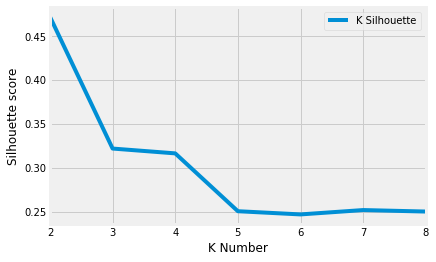

In [8]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'K Silhouette': k_silhouette}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
# Find the minimum testing error and the associated K value.
df.sort_values('K Silhouette',ascending=True)
df.plot(y='K Silhouette')
plt.xlabel('K Number')
plt.ylabel('Silhouette score')

In [ ]:
####Can't Use Agglomerative Clustering because my data set in to large for that tool

In [ ]:
# Calculate Silhouette score for k 1 though 15 to find best K for Agg
k_range = list(range(2, 15))
k_silhouette = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:
    # Instantiate the model with the current K value.
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(X)
    labels = agg.labels_
    
    # Calculate silhouette score.
    silhouette_score=metrics.silhouette_score(X, labels, metric='euclidean')
    k_silhouette.append(silhouee_score)

In [ ]:
# Create a DataFrame of K, training error, and testing error.
df2 = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
# Find the minimum testing error and the associated K value.
df2.sort_values('K Silhouette',ascending=True)
df2.plot(y='K Silhouette')